# 1. backend - tensorflow, CNTK, Theano => 중에 하나를 backend로 취하고 wrapper시킴
	   ※ tensorflow를 배우는 이유는 자동화를 하기 위해서

2. constant -variables(가중치) -placeholder(데이터주입)
=> 행렬연산(오차기반학습) -> loss function, activation, optimizer ->학습
	=> for문, epoch, batch size를 통해 분류 or 예측

=====> keras는 이 모든 과정을 함수화 해서 실행 - fit(scikit에 영향) 함수 사용
 	- compile(loss function, activation, optimizer을 매개변수로 사용)를 통해서 backend를 wrapper시켰음  (우리는 tensorflow 사용)

※ 가중치를 자동으로 구성해주는 것은 dense(출력차수, 입력차수) - tensorflow에서
    -> variable, placeholder이런 과정을 생략할 수 있음

3. model ( layer 방식으로 만듬 - 가중치 선언을 없앰)
	- layer을 추가할땐 add만 해주면 자동으로 추가해줌
	- return 받을 필요가 없다.(이전 layer에서 계산되어진 결과가 자동으로 다음 layer에 들어감)
	- 가중치 선언을 할 필요가 없다.
	- 출력 차수만 지정하면 됨
 § 모델을 만드는 방법
 1) sequential : 싱글 input, 싱글 output
 2) function : 멀티 input, 멀티 output
 3) model : 상속을 받아서 다양하게 사용(class base)


- 행렬연산에 필요한 것을 layer로 만들어 놓음(Input, dense, cnn(이미지로 분류와 예측), rnn(텍스트를 통해서 분류와 예측))
  -> input으로 데이터 받고 dense로 가중치 주면 회귀

데이터 입력 -> fit(epoch, batch size, valuelation data) -> 모델에 적용

evulator(테스트 데이터 넣음)
predict(실제 데이터)

keras (사이킷트하고 연결) - classifier, regressor로 객체를 만듬 -> pipeline, GridSearchCV 이용해서 loss, activation 등 하이퍼파라미터를 자동으로 튜닝

application을 하는 것은 transfer learning을 하는 것이다.
※ transfer learning : 처음 부터 가중치를 넣는 것은 오래걸리므로 같은 분야를 pre-training을 통해 미리 가중치를 학습시켜서 빠르게 적합시킴

GRU(망을 줄이면서 만드는 것-회로 3개(forget ,input, output회로-> update회로, ) - seq2seq(incode 망, decode 망, 이 두망을 연결한 state) 효율이 안좋음 -> attention 망을 만듬(자기들끼리의 관계, 가중치 3개(query, key, value)를 가지고 학습))
 => NNT (seq2seq + attention) => attention x => transformer => BERT


프로젝트 할때는 image data(전처리 -> opencv), sound data(전처리 -> librosa), text data(전처리 -> 를 잘 이용해야 한다.

In [1]:
from keras.models import Sequential # models 서브패키지 
from keras.layers import Dense     # layers = > 모델구성
from sklearn.datasets import make_regression
# 신경망 정규화
from sklearn.preprocessing import MinMaxScaler
#  100 x 2  ,y = 100
X , y = make_regression(n_samples = 100 , n_features=2,
                       noise = 0.1 , random_state = 1)
# 값의 범위가 다름 
scalarX , scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(100,1)) # 행으로

X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1))
# keras model 
model = Sequential() 
# 100 x 2 , 가중치 2 x 4 -> 100 x 4
model.add(Dense(4,input_dim = 2,activation = 'relu')) # 4 = 출력 차수 지정
# 100 x 4 -> 4 x 4 -> 100 x 4 
model.add(Dense(4,activation = 'relu'))
# 100 x 4 -> 4 x 1  -> 100 x 1 (예측) 
model.add(Dense(1,activation = 'linear'))
# backend = tensflow 
# mse . cross enthropy , KL-divergence: 분포를 비교 
model.compile(loss = 'mse', optimizer= 'adam') # tensorflow 모델을 변환
model.fit(X,y,epochs =1000, verbose=0)

Xnew, a = make_regression(n_samples = 3, n_features = 2, noise = 0.1,
                         random_state = 1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
    print("입력데이터 %s , 예측데이터 = %s" % (Xnew[i], ynew[i]))
#verbose = 학습 중 출력되는 문구를 설정합니다.
#- 0 : 아무 것도 출력하지 않습니다.
#- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
#- 2 : 미니 배치마다 손실 정보를 출력합니다.

Using TensorFlow backend.
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_12\Anaconda3\envs


입력데이터 [0.29466096 0.30317302] , 예측데이터 = [0.17293212]
입력데이터 [0.39445118 0.79390858] , 예측데이터 = [0.7447159]
입력데이터 [0.02884127 0.6208843 ] , 예측데이터 = [0.40443105]


In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data", delimiter=",")
X = dataset[:,0:8] # 8개의 독립변수
Y = dataset[:,8] # 1개의 종속변수
model = Sequential()
# ? x 8 =? 8 x 12 = > ? x 12 
model.add(Dense(12, input_dim = 8 , activation = 'relu'))
# ? x 12 -> 12 x 8 => ? x 8
model.add(Dense(8, activation = 'relu'))
# ? x 8 -> 12 x 1 => ? x 1  -> 분류 
model.add(Dense(1, activation = 'sigmoid')) # 0.5 기준 
model.compile(loss = 'binary_crossentropy', optimizer= 'adam',
             metrics=['accuracy'])
model.fit(X,Y, epochs= 150 , batch_size = 10)
# 평가하기
# 테스트 모드에서 모델의 손실 값 및 메트릭 값을 반환합니다.
scores = model.evaluate(X,Y)# x 입력데이터  y 대상 데이터 
# 1번,loss  2번.accuracy 
print(" \n%s: %2.f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/150
768/768 [==============================] - 0s 422us/step - loss: 3.1753 - accuracy: 0.5820
Epoch 2/150
768/768 [==============================] - 0s 88us/step - loss: 0.9556 - accuracy: 0.5716
Epoch 3/150
768/768 [==============================] - 0s 97us/step - loss: 0.7622 - accuracy: 0.6302
Epoch 4/150
768/768 [==============================] - 0s 92us/step - loss: 0.7211 - accuracy: 0.6471
Epoch 5/150
768/768 [==============================] - 0s 101us/step - loss: 0.6940 - accuracy: 0.6745
Epoch 6/150
768/768 [==============================] - 0s 114us/step - loss: 0.6683 - accuracy: 0.6862
Epoch 7/150
768/768 [==============================] - 0s 92us/step - loss: 0.6626 - accuracy: 0.6745
Epoch 8/150
768/768 [==============================] - 0s 79us/step - loss: 0.6480 - accuracy: 0.6875
Epoch 9/150
768/768 [==============================] - 0s 81us/step - loss: 0.6347 - ac

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data", delimiter=",")
X = dataset[:,0:8] # 8개의 독립변수
Y = dataset[:,8] # 1개의 종속변수
model = Sequential()
# uniform 균등분포 초기화 방법
model.add(Dense(12, input_dim = 8 , kernel_initializer="uniform",activation = 'relu'))
model.add(Dense(8, kernel_initializer="uniform" ,activation = 'relu'))
model.add(Dense(1, kernel_initializer="uniform", activation = 'sigmoid')) # 0.5 기준 
model.compile(loss = 'binary_crossentropy', optimizer= 'adam',
             metrics=['accuracy'])
# 추가 
# 데이터를 분리 입력 (train ,test) : 과적합 
# train , validation, test 
history = model.fit(X,Y,validation_split = 0.33,epochs = 150 , batch_size = 10)
scores = model.evaluate(X,Y)
# 1번,loss  2번.accuracy 
print(" \n%s: %2.f%%" % (model.metrics_names[1], scores[1]*100))

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 894us/step - loss: 0.6796 - accuracy: 0.6401 - val_loss: 0.6586 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 136us/step - loss: 0.6688 - accuracy: 0.6401 - val_loss: 0.6534 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 122us/step - loss: 0.6617 - accuracy: 0.6401 - val_loss: 0.6512 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 130us/step - loss: 0.6546 - accuracy: 0.6401 - val_loss: 0.6454 - val_accuracy: 0.6929
Epoch 5/150
514/514 [==============================] - 0s 120us/step - loss: 0.6457 - accuracy: 0.6440 - val_loss: 0.6364 - val_accuracy: 0.7126
Epoch 6/150
514/514 [==============================] - 0s 116us/step - loss: 0.6392 - accuracy: 0.6479 - val_loss: 0.6235 - val_accuracy: 0.6890
Epoch 7/150
514/514 [==============================] - 0s 124us/step - loss: 0.6321 

Epoch 57/150
514/514 [==============================] - 0s 118us/step - loss: 0.5404 - accuracy: 0.7296 - val_loss: 0.5669 - val_accuracy: 0.7165
Epoch 58/150
514/514 [==============================] - 0s 124us/step - loss: 0.5286 - accuracy: 0.7315 - val_loss: 0.5663 - val_accuracy: 0.7087
Epoch 59/150
514/514 [==============================] - 0s 113us/step - loss: 0.5416 - accuracy: 0.7335 - val_loss: 0.5555 - val_accuracy: 0.7323
Epoch 60/150
514/514 [==============================] - 0s 115us/step - loss: 0.5338 - accuracy: 0.7276 - val_loss: 0.5491 - val_accuracy: 0.7283
Epoch 61/150
514/514 [==============================] - 0s 116us/step - loss: 0.5325 - accuracy: 0.7374 - val_loss: 0.5615 - val_accuracy: 0.7402
Epoch 62/150
514/514 [==============================] - 0s 116us/step - loss: 0.5325 - accuracy: 0.7315 - val_loss: 0.5513 - val_accuracy: 0.7323
Epoch 63/150
514/514 [==============================] - 0s 118us/step - loss: 0.5269 - accuracy: 0.7315 - val_loss: 0.5487 -

514/514 [==============================] - 0s 116us/step - loss: 0.5098 - accuracy: 0.7471 - val_loss: 0.5184 - val_accuracy: 0.7677
Epoch 114/150
514/514 [==============================] - 0s 120us/step - loss: 0.5044 - accuracy: 0.7451 - val_loss: 0.5159 - val_accuracy: 0.7756
Epoch 115/150
514/514 [==============================] - 0s 113us/step - loss: 0.5055 - accuracy: 0.7568 - val_loss: 0.5148 - val_accuracy: 0.7638
Epoch 116/150
514/514 [==============================] - 0s 116us/step - loss: 0.5048 - accuracy: 0.7471 - val_loss: 0.5123 - val_accuracy: 0.7913
Epoch 117/150
514/514 [==============================] - 0s 113us/step - loss: 0.5105 - accuracy: 0.7432 - val_loss: 0.5402 - val_accuracy: 0.7559
Epoch 118/150
514/514 [==============================] - 0s 115us/step - loss: 0.5031 - accuracy: 0.7393 - val_loss: 0.5182 - val_accuracy: 0.7638
Epoch 119/150
514/514 [==============================] - 0s 118us/step - loss: 0.5086 - accuracy: 0.7510 - val_loss: 0.5160 - val_ac

In [4]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


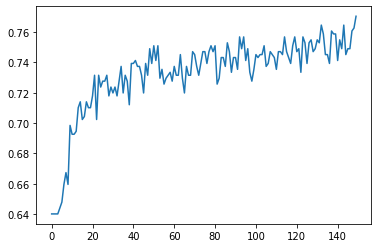

In [5]:
import matplotlib as mpl
import matplotlib.pylab as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


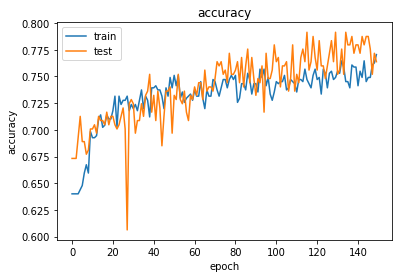

In [6]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc = 'upper left')
plt.show()

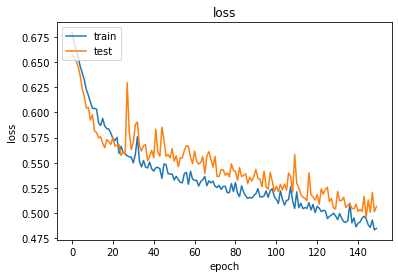

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'],loc = 'upper left')
plt.show()

# callback
모델이 epoch를 도는 순간에는 model.save를 사용할 순 없습니다.

이럴때 사용할 수 있게 callback이라는 기능을 제공을 해주었습니다. 

정한 epoch 또는 1 epoch이 끝날때마다 이 함수를 불러서 정해놓은 기능을 호출하는데요.

In [8]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.5)
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1000, 2)
(1000,)
(500, 2)
(500, 2)
(500,)
(500,)


[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'binary classification')]

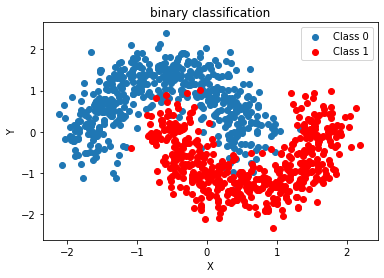

In [9]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label = 'Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label = 'Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='binary classification')

In [10]:
# 비선형모델 - 신경망 
import keras
model = Sequential()
# 행렬연산 => 설명을 확대 (변수 32-설명)
# 가중치가 있으면 바이어스도 있음
# 1000x2 가중치(2x32=64)+32(bias) = 96 => 1000x32
model.add(Dense(32, input_dim=2, activation='relu')) # 차원 확대
# 1000x32 32x1=32+1(bias)=33 =>1000x1 분류
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])

# callback 함수는 window에서 자동으로 호출되는 함수
tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph/model_1/', histogram_freq=100, write_graph=True, write_images=False)
# graph 이미지 출력
tb_callback.set_model(model) # 콜백을 모델에 등록

In [11]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose = 0, 
                 validation_data=(X_test, Y_test), callbacks=[tb_callback]) # 호출

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12789358568191528
Test accuracy: 0.949999988079071


In [13]:
keras.utils.print_summary(model)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


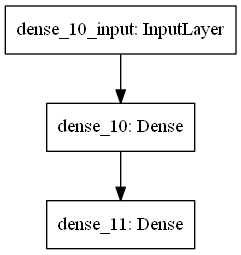

In [14]:
keras.utils.plot_model(model)

In [15]:
%matplotlib inline
from keras.utils import plot_model
from keras.utils import model_to_dot
model_to_dot(model)

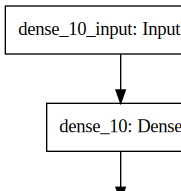

In [16]:
from IPython.display import SVG, Image
from keras.utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Callback class
# custom callback 함수의 제작
# 함수에 의해서 호출되는 객체
class CustomHistory(keras.callbacks.Callback) : # 상속
    def init(self) : #__init__이 아니므로 호출가능
        self.train_loss = []
        self.val_loss=[]
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}) :  # 오버라이딩
        self.train_loss.append(logs.get("loss"))
        self.val_loss.append(logs.get("val_loss"))
        self.train_loss.append(logs.get("accuracy"))
        self.val_loss.append(logs.get("val_accuracy"))

In [19]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, X_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(X_test0.shape, X_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000, 28, 28) uint8


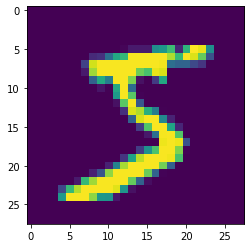

In [20]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [21]:
# fully-connected : flatten -> FFNN은 데이터가 1줄로 들어가야함
# 이미지 정규화  : 0~255 컬러값 / 255 => 0~1
X_train = X_train0.reshape(60000,784).astype('float32')/ 255.0
X_test = X_test0.reshape(10000,784).astype('float32')/255.0
print(X_train.shape,X_train.dtype)

(60000, 784) float32


In [22]:
y_train0[:5] # one-hot encoding 여부 
#        => 전진망에서 분류는 softmax로, multi-label(binary_entropy) => softmax(3개가 넘어가면 사용,경우의 수에 대한 확률값)
# 5, 0, 4, 1, 9 -> 안되어 있음

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0,10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [44]:
import numpy as np
from keras.optimizers import SGD
np.random.seed(0)
model = Sequential()
# 60000x784 784x15 => 60000x15
model.add(Dense(15, input_dim=784, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
# lr : learning rate
# stochastic gradient descent
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [45]:
model.layers

In [46]:
l1 = model.layers[0]
l2 = model.layers[1]
l1.name
l1.input_shape
l1.output_shape
l1.activation

<function keras.activations.sigmoid(x)>

C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 7s - loss: 0.1019 - accuracy: 0.2440 - val_loss: 0.0864 - val_accuracy: 0.3212
Epoch 2/30
 - 7s - loss: 0.0845 - accuracy: 0.3921 - val_loss: 0.0821 - val_accuracy: 0.4409
Epoch 3/30
 - 6s - loss: 0.0796 - accuracy: 0.4997 - val_loss: 0.0765 - val_accuracy: 0.5340
Epoch 4/30
 - 6s - loss: 0.0740 - accuracy: 0.5620 - val_loss: 0.0707 - val_accuracy: 0.5852
Epoch 5/30
 - 6s - loss: 0.0682 - accuracy: 0.6149 - val_loss: 0.0649 - val_accuracy: 0.6522
Epoch 6/30
 - 7s - loss: 0.0625 - accuracy: 0.6759 - val_loss: 0.0594 - val_accuracy: 0.6998
Epoch 7/30
 - 5s - loss: 0.0576 - accuracy: 0.7101 - val_loss: 0.0551 - val_accuracy: 0.7316
Epoch 8/30
 - 7s - loss: 0.0537 - accuracy: 0.7325 - val_loss: 0.0516 - val_accuracy: 0.7485
Epoch 9/30
 - 7s - loss: 0.0505 - accuracy: 0.7474 - val_loss: 0.0486 - val_accuracy: 0.7639
Epoch 10/30
 - 7s - loss: 0.0478 - accuracy: 0.7609 - val_loss: 0.0461 - val_accuracy: 0.7759
Epoch 11/30
 - 7s -

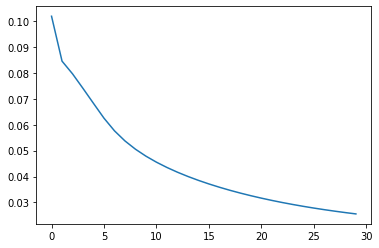

In [47]:
custom_hist = CustomHistory()
custom_hist.init()
hist = model.fit(X_train, Y_train, nb_epoch = 30, batch_size=100,
                validation_data=(X_test, Y_test), callbacks=[custom_hist], verbose=2)
plt.plot(hist.history['loss'])
plt.show()

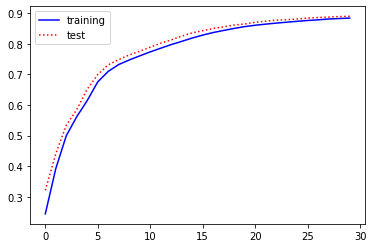

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.24401666, 0.39213333, 0.49971667, 0.56201667, 0.6149167, 0.6759167, 0.7101333, 0.7325, 0.7474167, 0.76085, 0.77395, 0.7858833, 0.79766667, 0.8082833, 0.81918335, 0.82878333, 0.83713335, 0.84403336, 0.8506333, 0.85646665, 0.8609667, 0.8646167, 0.86795, 0.87091666, 0.87381667, 0.87651664, 0.8786833, 0.88136667, 0.8829, 0.8844]
0.8903999924659729


In [50]:
plt.plot(hist.history['accuracy'], 'b-', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='test')
plt.legend()
plt.show()

print(hist.model)
print("=====================================================================")
print(hist.params)
print("=====================================================================")
print(hist.history['accuracy'])
print("=====================================================================")
print(hist.history['val_accuracy'][29])

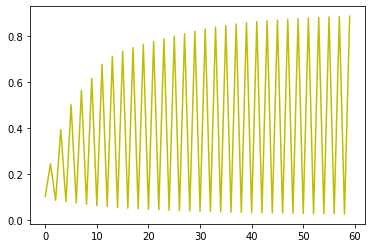

In [51]:
plt.plot(custom_hist.train_loss, 'y', label = 'train loss')
plt.show()

In [52]:
from tensorflow import keras
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_loss.append(logs.get('accuracy'))
        self.val_loss.append(logs.get('val_accuracy'))

In [53]:
# 문제 X_test 의 이미지 한장의 label 을 예측하시요 
model.predict(X_test[:1,:])

array([[0.01767004, 0.01917329, 0.01319787, 0.02869663, 0.01251969,
        0.05721784, 0.01232022, 0.94186753, 0.00762814, 0.05536831]],
      dtype=float32)

In [54]:
model.predict_classes(X_test[:1,:], verbose = 0)

array([7], dtype=int64)

In [55]:
# c출력차수가 512인 레이어를 추가

In [56]:
# 집값 예측
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
# 404 x 13 , 404 , 102 , 13 , 102

In [57]:
model = Sequential()
num_features = 13
model.add(Dense(1, input_dim=num_features, activation='linear'))

In [58]:
model.summary()
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
404/404 [==============================] - 0s 859us/step - loss: 28031.2535 - mae: 127.1642
Epoch 2/10
404/404 [==============================] - 0s 625us/step - loss: 3554.3965 - mae: 46.6836
Epoch 3/10
404/404 [==============================] - 0s 627us/step - loss: 1257.6941 - mae: 27.5113
Epoch 4/10
404/404 [==============================] - 0s 583us/step - loss: 298.5174 - mae: 12.8495
Epoch 5/10
404/404 [==============================] - 0s 615us/step - loss: 140.4095 - mae: 8.7667
Epoch 6/10
404/404 [==============================] - 0s 592us/step - loss: 126.6947 - mae: 8.0275
Epoch 7/10
404/404 [============================

In [59]:
mse, mae = model.evaluate(x_test, y_test, verbose = False)
rmse = np.sqrt(mse)
mse, rmse , mae 

(80.5265775194355, 8.973660207486994, 6.593564033508301)

In [60]:
# 문제: x_test의 앞의 3집을 예측해 보시요

In [61]:
pred =model.predict(x_test[:3,:])

In [62]:
real = y_test[:3]

In [63]:
# 상관계수를 확인하시요

In [64]:
import numpy as np
np.corrcoef(pred.reshape(1,3), real)

array([[1.        , 0.91582434],
       [0.91582434, 1.        ]])

In [65]:
# scikits -- keras를 연결 : kerasClassifier , kerasRegressor
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [41]:
# 768 x 9 -> 768 ,8 독립변수 , 768 ,1 종속변수
# 변수 8
def create_model():
    model = Sequential()
    # 8 x 12 => 768 x 12
    model.add(Dense(12, input_dim = 8, activation='relu'))
    # 768 x 12 => 768 x 1 
    model.add(Dense(1, activation = 'sigmoid')) # 0 ~ 1
    model.compile(loss = 'binary_crossentropy', optimizer='adam',
                 metrics = ['accuracy'])
    return model
numpy.random.seed(7)
datasets = numpy.loadtxt('pima.csv', delimiter = ",")
X = dataset[:,0:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn= create_model, verbose=0)

In [40]:
# 파라미터 조합 
batch_size = [10,20,40,60,80,100]
epochs = [10,50,100]
# 매개 변수 입력 형태는 dict 
param_grid = dict(batch_size= batch_size, epochs = epochs)
grid = GridSearchCV(estimator =model , param_grid = param_grid
                    , n_jobs=-1) # 참여 cpu 개수 
grid_result = grid.fit(X,Y)
print("스코어 : %f 사용한 조합 :%s" % (grid_result.best_score_,
                               grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with : %r" %(mean,stdev,param))

스코어 : 0.704482 사용한 조합 :{'batch_size': 20, 'epochs': 100}
0.593855 (0.047930) with : {'batch_size': 10, 'epochs': 10}
0.684899 (0.049045) with : {'batch_size': 10, 'epochs': 50}
0.699262 (0.037744) with : {'batch_size': 10, 'epochs': 100}
0.583261 (0.047846) with : {'batch_size': 20, 'epochs': 10}
0.658959 (0.035523) with : {'batch_size': 20, 'epochs': 50}
0.704482 (0.039870) with : {'batch_size': 20, 'epochs': 100}
0.505416 (0.096619) with : {'batch_size': 40, 'epochs': 10}
0.684993 (0.038423) with : {'batch_size': 40, 'epochs': 50}
0.673237 (0.034790) with : {'batch_size': 40, 'epochs': 100}
0.531135 (0.093110) with : {'batch_size': 60, 'epochs': 10}
0.640616 (0.017772) with : {'batch_size': 60, 'epochs': 50}
0.656353 (0.040216) with : {'batch_size': 60, 'epochs': 100}
0.536644 (0.099053) with : {'batch_size': 80, 'epochs': 10}
0.639318 (0.040176) with : {'batch_size': 80, 'epochs': 50}
0.662754 (0.017814) with : {'batch_size': 80, 'epochs': 100}
0.530218 (0.128985) with : {'batch_siz

In [ ]:
# 가중치 초기화 매개변수를 넣고 (kernel_initializer) 
# ['uniform', lecun_uniform, normal, zero ,glorot_normal , glorot_uniform,
# he_normal, he_uniform]
# dense 1 : v 함수를 달아주고
#[softmax, softplus, softsign, relu,tanh,sigmoid, hard_sigmoid,linear]

In [78]:
init_mode =['uniform', 'lecun_uniform', 'normal', 'zero' ,'glorot_normal' ,
                     'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign',' relu','tanh','sigmoid', 'hard_sigmoid','linear']

In [87]:
def create_model(init_mode, activation):
    model = Sequential()
    model.add(Dense(12, input_dim = 8, activation=activation))
    model.add(Dense(1,kernel_initializer = init_mode, activation = 'sigmoid')) # 0 ~ 1
    model.compile(loss = 'binary_crossentropy', optimizer='adam',
                 metrics = ['accuracy'])
    return model
numpy.random.seed(7)
datasets = numpy.loadtxt('pima.csv', delimiter = ",")
X = dataset[:,0:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn= create_model, verbose=0)

In [88]:
# 매개 변수 입력 형태는 dict 
param_grid = dict(init_mode= init_mode, activation = activation)
grid = GridSearchCV(estimator =model , param_grid = param_grid
                    , n_jobs=-1) # 참여 cpu 개수 
grid_result = grid.fit(X,Y)
print("스코어 : %f 사용한 조합 :%s" % (grid_result.best_score_,
                               grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with : %r" %(mean,stdev,param))

스코어 : 0.662864 사용한 조합 :{'activation': 'relu', 'init_mode': 'zero'}
0.613310 (0.085532) with : {'activation': 'softmax', 'init_mode': 'uniform'}
0.515491 (0.147172) with : {'activation': 'softmax', 'init_mode': 'lecun_uniform'}
0.600314 (0.091357) with : {'activation': 'softmax', 'init_mode': 'normal'}
0.651159 (0.052445) with : {'activation': 'softmax', 'init_mode': 'zero'}
0.502742 (0.159643) with : {'activation': 'softmax', 'init_mode': 'glorot_normal'}
0.588643 (0.104792) with : {'activation': 'softmax', 'init_mode': 'glorot_uniform'}
0.476267 (0.123438) with : {'activation': 'softmax', 'init_mode': 'he_normal'}
0.445370 (0.144108) with : {'activation': 'softmax', 'init_mode': 'he_uniform'}
0.533826 (0.084468) with : {'activation': 'softplus', 'init_mode': 'uniform'}
0.530923 (0.136060) with : {'activation': 'softplus', 'init_mode': 'lecun_uniform'}
0.568084 (0.152623) with : {'activation': 'softplus', 'init_mode': 'normal'}
0.643332 (0.048742) with : {'activation': 'softplus', 'ini

In [96]:
# Use scikit-learn to grid search the weight initialization
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='var_accuracy', patience=3, verbose=1)
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform',optimizer='relu',dropout_rate=0.1):
# create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation=optimizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
dataset = numpy.loadtxt("pima.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
# Earlystopping
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=1)
# define the grid search parameters
dropout_rate=[0.1,0.2,0.3] # ,0.4,0.5,0.6,0.7,0.8,0.9
init_mode = ['uniform', 'lecun_uniform','normal','zero','glorot_normal','glorot_uniform','he_normal','he_uniform']
optimizer = ['softmax','relu' , 'softplus', 'softsign','tanh','sigmoid','hard_sigmoid','linear']
param_grid = dict(init_mode=init_mode,optimizer=optimizer,dropout_rate=dropout_rate)
fit_params = dict(callbacks=[stopper])
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# 변동 매개변수
grid_result = grid.fit(X, Y, **fit_params)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas
import numpy

In [49]:
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
X = dataset[:, 0:13]
Y = dataset[:, 13]

In [66]:
def larger_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer="normal", activation="relu"))
    model.add(Dense(6,kernel_initalizer = 'normal', activation ='relu'))
    model.add(Dense(1, kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [67]:
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer="normal", activation="relu"))
    model.add(Dense(1, kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [68]:
def wider_model():
    model = Sequential()
    model.add(Dense(20,input_dim=20, kernel_initializer="normal", activation="relu"))
    model.add(Dense(1, kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [60]:
seed = 7
numpy.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

In [61]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -101.99 (72.19) MSE


In [55]:
numpy.random.seed(7)
estimator =  KerasRegressor(build_fn=baseline_model, nb_epoch =100,
                           batch_size = 5, verbose = 0)

In [56]:
numpy.random.seed(7)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn =baseline_model,
                                        epochs = 50 ,batch_size = 5, verbose =0)))
pipeline= Pipeline(estimators)
kfold = KFold(n_splits =10 , random_state = 7)
results = cross_val_score(pipeline, X, Y , cv = kfold)
print("standardized : %.2f(%.2f) mse" % (results.mean(),
                                        results.std()))


KeyboardInterrupt: 

In [57]:
numpy.random.seed(7)
estimator =  KerasRegressor(build_fn=wider_model, nb_epoch =100,
                           batch_size = 5, verbose = 0)

In [69]:
numpy.random.seed(7)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn =wider_model,
                                        epochs = 50 ,batch_size = 5, verbose =0)))
pipeline= Pipeline(estimators)
kfold = KFold(n_splits =10 , random_state = 7)
results = cross_val_score(pipeline, X, Y , cv = kfold)
print("standardized : %.2f(%.2f) mse" % (results.mean(),
                                        results.std()))


C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_257_input to have shape (20,) but got array with shape (13,)

  FitFailedWarning)
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_259_input to have shape (20,) but got array wi

standardized : nan(nan) mse


C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_271_input to have shape (20,) but got array with shape (13,)

  FitFailedWarning)
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking input: expected dense_273_input to have shape (20,) but got array with shape (13,)

  FitFailedWarning)
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checki

In [62]:
numpy.random.seed(7)
estimator =  KerasRegressor(build_fn=larger_model, nb_epoch =100,
                           batch_size = 5, verbose = 0)

In [70]:
numpy.random.seed(7)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn =larger_model,
                                        epochs = 50 ,batch_size = 5, verbose =0)))
pipeline= Pipeline(estimators)
kfold = KFold(n_splits =10 , random_state = 7)
results = cross_val_score(pipeline, X, Y , cv = kfold)
print("standardized : %.2f(%.2f) mse" % (results.mean(),
                                        results.std()))


C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: ('Keyword argument not understood:', 'kernel_initalizer')

  FitFailedWarning)
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: ('Keyword argument not understood:', 'kernel_initalizer')

  FitFailedWarning)
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packag

standardized : nan(nan) mse


C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: ('Keyword argument not understood:', 'kernel_initalizer')

  FitFailedWarning)


In [44]:
pipeline.fit(X,Y)

TypeError: ('Keyword argument not understood:', 'kernel_initalizer')

In [45]:
res = pipeline.predict(X)
res[0]

AttributeError: 'KerasRegressor' object has no attribute 'model'

In [46]:
import numpy as np
np.corrcoef(res,Y)

NameError: name 'res' is not defined

In [47]:
# 숙제
-air.cvs 데이터 로딩한 다음
-회귀망을 구성하시요
-paramter tuning 을 구형하시요 (pipeline 사용도 함께)

SyntaxError: invalid syntax (<ipython-input-47-8ebc2f13a1cf>, line 2)